<a href="https://colab.research.google.com/github/KRANCHejb-01-2827/Crunchplp/blob/main/Dsaic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

df_train.head()


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [11]:
# Check structure and missing values
print("Training Data Info:")
print(data1.info())
print("\nTest Data Missing Values:")
print(data2.isnull().sum())

# Remove duplicate rows
data1.drop_duplicates(inplace=True)
print("\nDuplicates removed successfully.")



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None

Test Data Missing Values:
country 

In [14]:
from sklearn.preprocessing import LabelEncoder

Label_enc = LabelEncoder()

for col in data1.select_dtypes(include=['object']).columns:
    data1[col] = Label_enc.fit_transform(data1[col].astype(str))

# Show result once, after encoding all columns
data1.head()


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,0,1,3,24,0,5,2,3,9
1,0,2018,1111,0,0,0,5,70,0,1,4,0,4
2,0,2018,2222,1,1,1,5,26,1,3,3,5,9
3,0,2018,3333,0,0,1,5,34,0,1,2,2,3
4,0,2018,4444,0,1,0,8,26,1,0,3,2,5


In [24]:
X = data1.drop("gender_of_respondent", axis=1)
y = data1["gender_of_respondent"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.8242295430393198

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2776
           1       0.78      0.79      0.79      1929

    accuracy                           0.82      4705
   macro avg       0.82      0.82      0.82      4705
weighted avg       0.82      0.82      0.82      4705



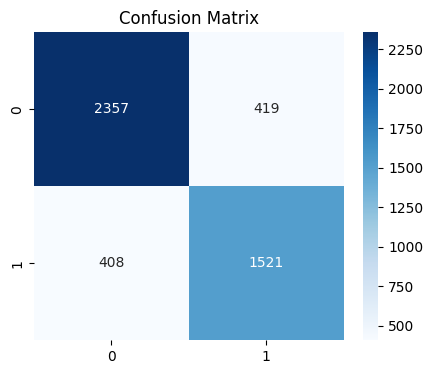

In [26]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [27]:
# Pick one sample from the test data
sample = X_test.iloc[0:1]

# Predict
prediction = model.predict(sample)

print("Prediction (1 = Has account, 0 = No account):", prediction)

# You can also check the actual value if it's available
print("Actual:", y_test.iloc[0])


Prediction (1 = Has account, 0 = No account): [0]
Actual: 0
